In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
columns = ['neighbourhood_group', 'room_type','latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
           'reviews_per_month','calculated_host_listings_count', 'availability_365']
df[columns]

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,70,2,0,NaN,2,9
48891,Brooklyn,Private room,40.70184,-73.93317,40,4,0,NaN,2,36
48892,Manhattan,Entire home/apt,40.81475,-73.94867,115,10,0,NaN,1,27
48893,Manhattan,Shared room,40.75751,-73.99112,55,1,0,NaN,6,2


## Question 1

In [4]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

### __Manhattan__ is the most frequent object in the column

In [5]:
df = df[columns]
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [6]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Split the dataframe in train, test, validation

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

In [9]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values
y_train_lr = y_train.copy()
y_val_lr = y_val.copy()
y_test_lr = y_test.copy()

In [10]:
del df_train['price']
del df_val['price']
del df_test['price']

In [11]:
df_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.076564,0.023254,-0.009476,-0.012338,0.020622,-0.005611
longitude,0.076564,1.000000,-0.063291,0.054183,0.137860,-0.117461,0.084543
minimum_nights,0.023254,-0.063291,1.000000,-0.073806,-0.119621,0.120404,0.140095
number_of_reviews,-0.009476,0.054183,-0.073806,1.000000,0.591769,-0.073796,0.169187
reviews_per_month,-0.012338,0.137860,-0.119621,0.591769,1.000000,-0.050630,0.162559
calculated_host_listings_count,0.020622,-0.117461,0.120404,-0.073796,-0.050630,1.000000,0.226220
availability_365,-0.005611,0.084543,0.140095,0.169187,0.162559,0.226220,1.000000


## Question 2

<AxesSubplot:>

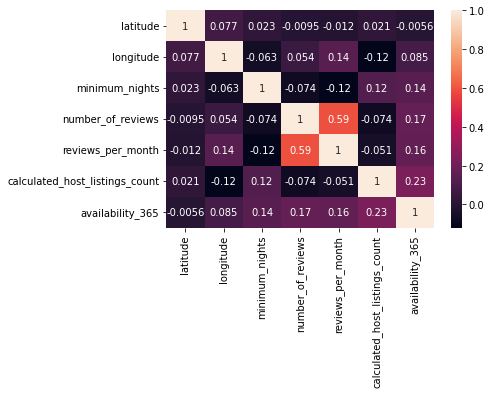

In [12]:
sns.heatmap(_, annot=True)

### Two features with the biggest correlation is __number_of_reviews__ and __reviews_per_month__

## Make price binary

In [13]:
y_train

array([ 99, 125,  95, ..., 299,  65,  92])

In [14]:
y_train = (y_train >= 152).astype(int)
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
y_val = (y_val >= 152).astype(int)
y_test = (y_test >= 152).astype(int)

### Calculate risk

In [16]:
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']

In [17]:
from IPython.display import display

In [18]:
global_mean = df_train_full.price.mean()
for col in categorical:
    df_group = df_train_full.groupby(by=col).price.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
neighbourhood_group,,,
Bronx,89.109954,-64.641631,0.579571
Brooklyn,124.630467,-29.121118,0.810596
Manhattan,198.608688,44.857103,1.291751
Queens,99.323963,-54.427623,0.646003
Staten Island,116.037415,-37.714170,0.754707


,mean,diff,risk
room_type,,,
Entire home/apt,212.495584,58.743999,1.382071
Private room,90.869507,-62.882078,0.591015
Shared room,70.146899,-83.604686,0.456235


## Question 3

In [19]:
from sklearn.metrics import mutual_info_score

In [20]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

In [21]:
df_mi = df_train[categorical].apply(calculate_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
room_type,0.14
neighbourhood_group,0.05


### room_type has the bigger mutual index score

## Question 4

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'neighbourhood_group': 'Queens',
 'room_type': 'Entire home/apt',
 'latitude': 40.74496,
 'longitude': -73.89534,
 'minimum_nights': 1,
 'number_of_reviews': 118,
 'reviews_per_month': 6.0,
 'calculated_host_listings_count': 1,
 'availability_365': 320}

In [24]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [25]:
X_train = dv.transform(train_dict)

In [26]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=1500)
model = LogisticRegression(solver='liblinear', random_state=41)
model.fit(X_train, y_train)

LogisticRegression(random_state=41, solver='liblinear')

In [29]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [30]:
model.predict_proba(X_val)

array([[0.97161355, 0.02838645],
       [0.40412488, 0.59587512],
       [0.56879245, 0.43120755],
       ...,
       [0.87696255, 0.12303745],
       [0.834328  , 0.165672  ],
       [0.32552423, 0.67447577]])

In [31]:
y_pred = model.predict_proba(X_val)[:, 1]

In [32]:
price = y_pred > 0.5

In [33]:
accuracy = (y_val == price).mean()
accuracy

0.7936323495235882

### the accuracy of the model is 79%

## Question 5

In [34]:
def get_model_accuracy(col):
    train_dicts = df_train[col].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = df_val[col].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
#     model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=2000)
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    price_decision = (y_pred > 0.5)
    accuracy = (y_val == price_decision).mean()

    return accuracy

In [35]:
original_accuracy = accuracy
question_list = ['neighbourhood_group', 'room_type', 'number_of_reviews', 'reviews_per_month']
for col in (categorical + numerical):
    cols = set(categorical + numerical) - set([col])
    new_accuracy = get_model_accuracy(cols)
    if col in question_list:
        display(f'Model accuracy for {col} is {new_accuracy}')
        diff = original_accuracy - new_accuracy
        display(f'Difference in accuracy for {col} is {diff}')

'Model accuracy for neighbourhood_group is 0.7495545743279882'

'Difference in accuracy for neighbourhood_group is 0.044077775195599966'

'Model accuracy for room_type is 0.7311178247734139'

'Difference in accuracy for room_type is 0.06251452475017427'

'Model accuracy for number_of_reviews is 0.7940196761949028'

'Difference in accuracy for number_of_reviews is -0.00038732667131458065'

'Model accuracy for reviews_per_month is 0.7931675575180107'

'Difference in accuracy for reviews_per_month is 0.0004647920055774746'

## The feature with the smallest difference is number_of_reviews

## Question 6

In [47]:
from sklearn.linear_model import Ridge

In [48]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [49]:
alpha = [0, 0.01, 0.1, 1, 10]

In [50]:
y_train_normalized = np.log1p(y_train_lr)
y_val_normalized = np.log1p(y_val_lr)

In [53]:
for a in alpha:
    model = Ridge(a, normalize=True)
    model.fit(X_train, y_train_normalized)
    y_pred = model.predict(X_val)
    rmse_ridge = rmse(y_val_normalized, y_pred)
    display(f'RMSE for alpha={a} is {rmse_ridge}')

'RMSE for alpha=0 is 0.49667730443295643'

'RMSE for alpha=0.01 is 0.4967110611089901'

'RMSE for alpha=0.1 is 0.4977995526950482'

'RMSE for alpha=1 is 0.5250783157263188'

'RMSE for alpha=10 is 0.6379319903886087'